In [7]:
# PIZZA SALES ANALYSIS

In [3]:
from itertools import groupby

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from IPython.core.pylabtools import figsize
from setuptools.command.rotate import rotate
from traitlets import observe

In [ ]:
# IMPORTING THE DATASET

In [6]:
df=pd.read_csv(r"C:\Users\udays\OneDrive\Documents\pizza\pizza_sales.csv")

In [8]:
# Top 5 rows of DataFrame
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
# Bottom 5 rows of DataFrame
df.tail(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [10]:
print(f"The metadata for dataset:{df.shape}")

The metadata for dataset:(48620, 12)


In [11]:
print(f"The rows for dataset: {df.shape[0]}")

The rows for dataset:48620


In [15]:
print(f"The column for dataset :{df.shape[1]}")

The column for dataset :12


In [16]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='str')

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  str    
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  str    
 5   order_time         48620 non-null  str    
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  str    
 9   pizza_category     48620 non-null  str    
 10  pizza_ingredients  48620 non-null  str    
 11  pizza_name         48620 non-null  str    
dtypes: float64(2), int64(3), str(7)
memory usage: 4.5 MB


In [18]:
# Data Type
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id            str
quantity               int64
order_date               str
order_time               str
unit_price           float64
total_price          float64
pizza_size               str
pizza_category           str
pizza_ingredients        str
pizza_name               str
dtype: object

In [19]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
#KPI's

In [36]:
total_revenue=df['total_price'].sum()
total_pizza_sold=df['quantity'].sum()
total_order=df['order_id'].nunique()
avg_order_value=total_revenue/total_order
avg_pizza_per_order=total_pizza_sold/total_order

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizza Sold: {total_pizza_sold}")
print(f"Total Order: {total_order:,}")
print(f"Avg Order Value: ${avg_order_value:,.2f}")
print(f"Avg Pizza Per Order: {avg_pizza_per_order:,.2f}")

Total Revenue: $817,860.05
Total Pizza Sold: 49574
Total Order: 21,350
Avg Order Value: $38.31
Avg Pizza Per Order: 2.32


In [ ]:
# Charts

In [ ]:
# Ingrediant Analysis

In [47]:
ingrediants=(
    df['pizza_ingredients']
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={"index":"counts","pizza_ingredients":"Ingredients"})
)
print(ingrediants.head(10))

         Ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


In [ ]:
# Daily Trend --- Total Order

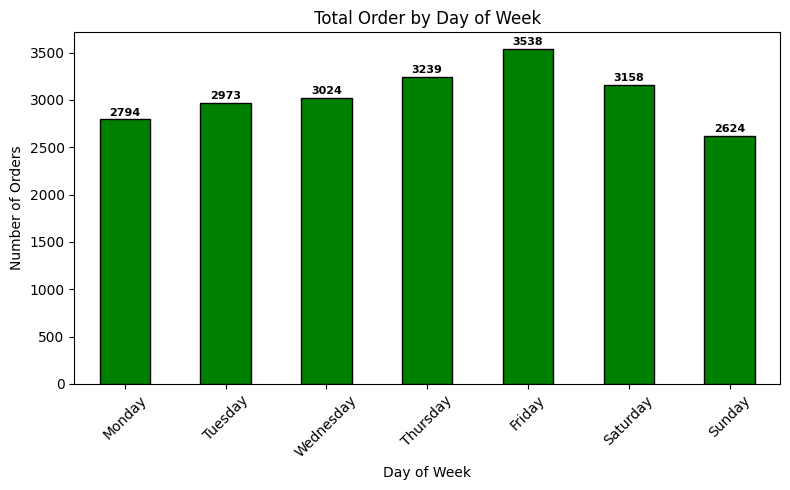

In [74]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name']=df['order_date'].dt.day_name()

# As pandas give output in alphabetical order so , change it to categorical.
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

order_by_day=df.groupby('day_name',observed=False)['order_id'].nunique()

ax=order_by_day.plot(kind='bar',figsize=(8,5),color="green",edgecolor='black')

plt.title("Total Order by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i,val in enumerate(order_by_day):
    plt.text(i,val+20,str(val),ha="center",va='bottom',fontsize=8,fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# For Total Revenue

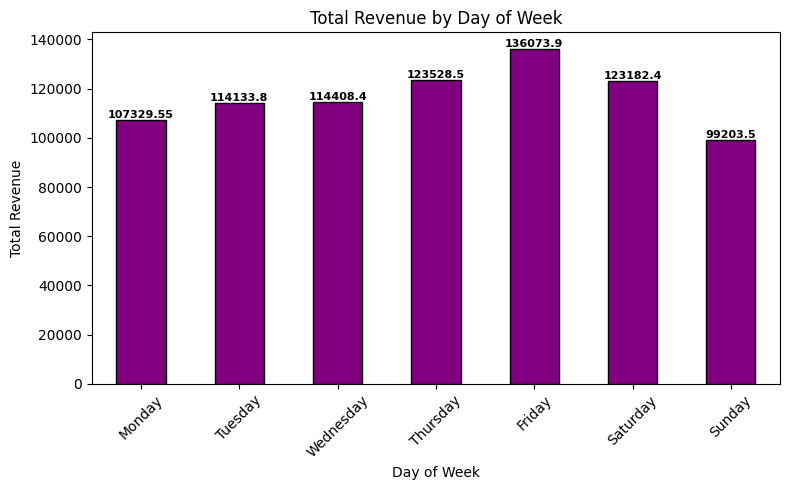

In [80]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name']=df['order_date'].dt.day_name()

# As pandas give output in alphabetical order so , change it to categorical.
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

order_by_day=df.groupby('day_name',observed=False)['total_price'].sum()

ax=order_by_day.plot(kind='bar',figsize=(8,5),color="purple",edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(order_by_day):
    plt.text(i,val+20,str(val),ha="center",va='bottom',fontsize=8,fontweight="bold")

plt.tight_layout()
plt.show()

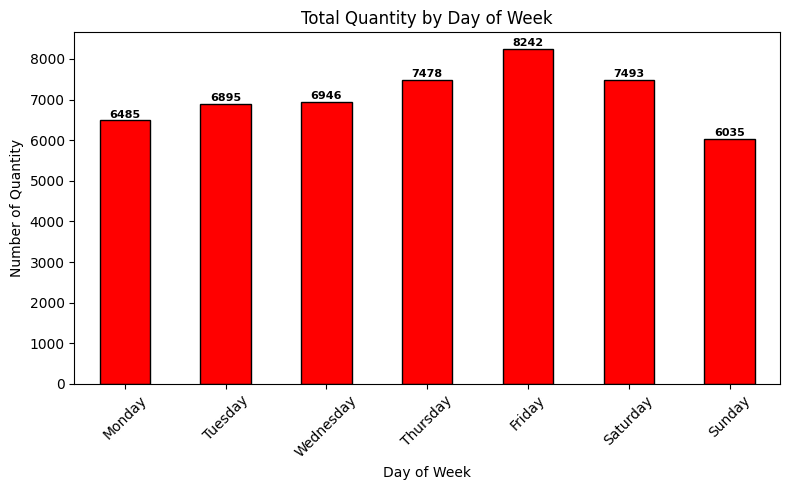

In [83]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name']=df['order_date'].dt.day_name()

# As pandas give output in alphabetical order so , change it to categorical.
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

order_by_day=df.groupby('day_name',observed=False)['quantity'].sum()

ax=order_by_day.plot(kind='bar',figsize=(8,5),color="red",edgecolor='black')

plt.title("Total Quantity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Quantity")
plt.xticks(rotation=45)

for i,val in enumerate(order_by_day):
    plt.text(i,val+20,str(val),ha="center",va='bottom',fontsize=8,fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# Hourly Trend --- Total Order

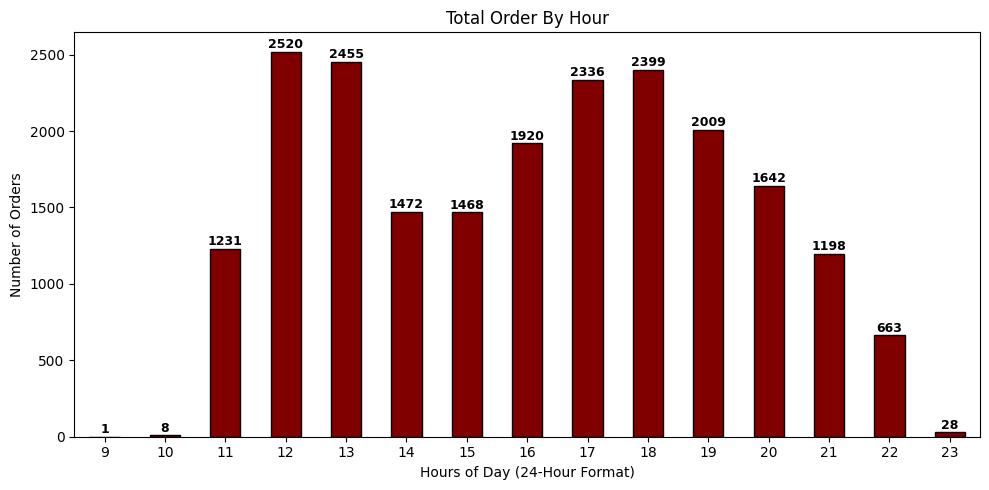

In [101]:
df['order_time']=pd.to_datetime(df['order_time'],format="%H:%M:%S")

df['order_hour']=df['order_time'].dt.hour

order_by_hour=df.groupby("order_hour",observed=False)['order_id'].nunique()

ax=order_by_hour.plot(kind='bar',figsize=(10,5),color="maroon",edgecolor='black')
plt.title("Total Order By Hour")
plt.ylabel("Number of Orders")
plt.xlabel("Hours of Day (24-Hour Format)")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight="bold")

plt.tight_layout()
plt.show()

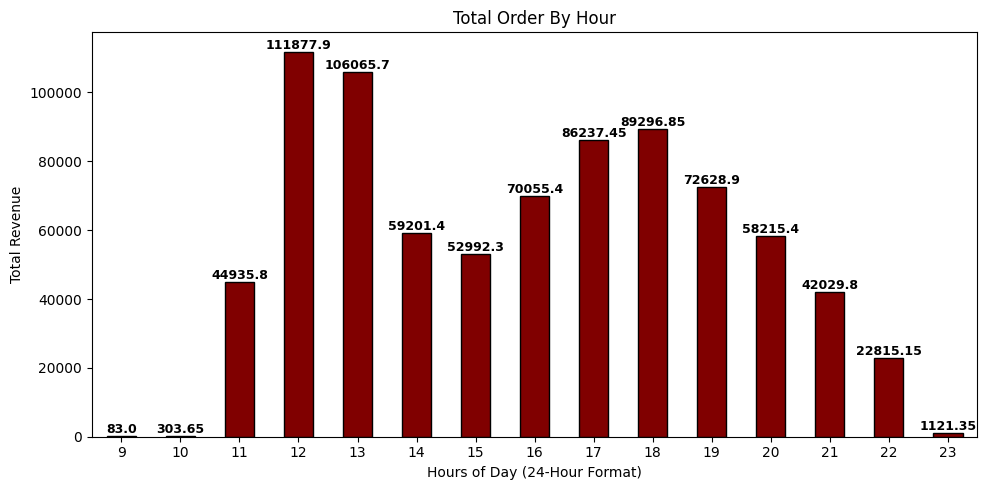

In [103]:
df['order_time']=pd.to_datetime(df['order_time'],format="%H:%M:%S")

df['order_hour']=df['order_time'].dt.hour

order_by_hour=df.groupby("order_hour",observed=False)['total_price'].sum()

ax=order_by_hour.plot(kind='bar',figsize=(10,5),color="maroon",edgecolor='black')
plt.title("Total Revenue By Hour")
plt.ylabel("Total Revenue")
plt.xlabel("Hours of Day (24-Hour Format)")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight="bold")

plt.tight_layout()
plt.show()

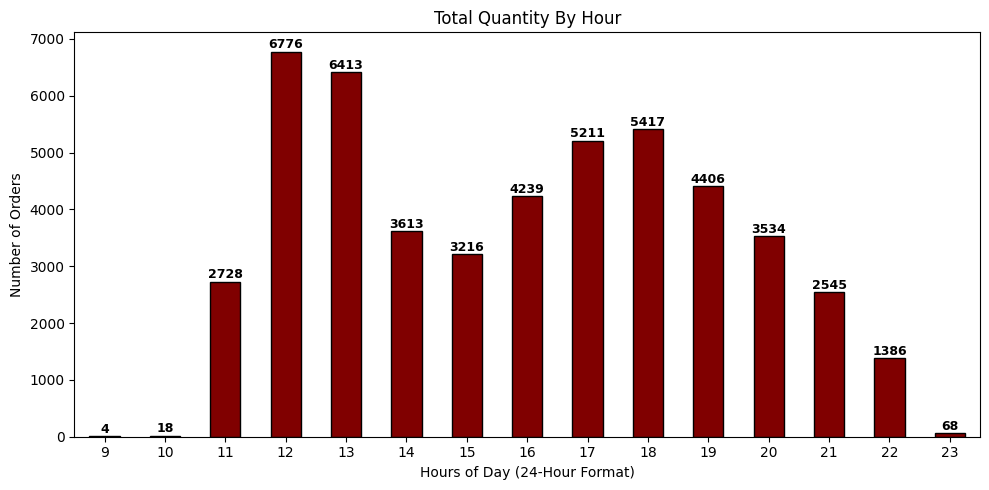

In [104]:
df['order_time']=pd.to_datetime(df['order_time'],format="%H:%M:%S")

df['order_hour']=df['order_time'].dt.hour

order_by_hour=df.groupby("order_hour",observed=False)['quantity'].sum()

ax=order_by_hour.plot(kind='bar',figsize=(10,5),color="maroon",edgecolor='black')
plt.title("Total Quantity By Hour")
plt.ylabel("Number of Orders")
plt.xlabel("Hours of Day (24-Hour Format)")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
    plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=9,fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# Monthly Trend --- Total Orders

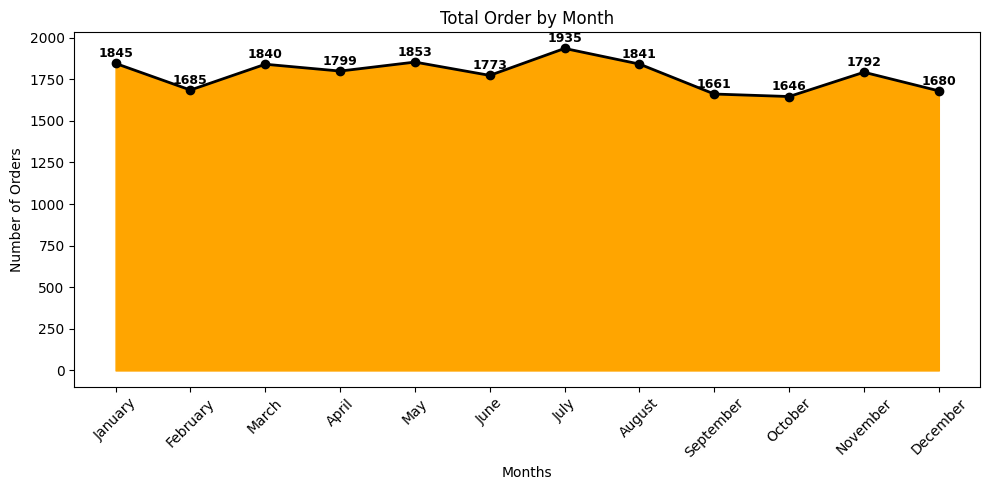

In [136]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['month_name']=df['order_date'].dt.month_name()

month_order = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)

order_in_month=df.groupby('month_name',observed=False)['order_id'].nunique()

# ax=order_in_month.plot(kind='bar',figsize=(10,5),color='pink')

plt.figure(figsize=(10,5))
plt.fill_between(order_in_month.index,order_in_month.values,color='orange')
plt.plot(order_in_month.index,order_in_month.values,color='black',linewidth=2,marker='o')

plt.title("Total Order by Month")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
# Rotate the labels at x-axis
plt.xticks(rotation=45)

for i,val in enumerate(order_in_month):
    plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# % of Sales By Category

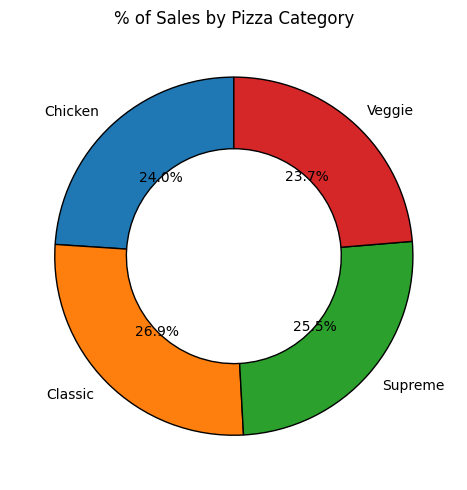

In [148]:
category_sales=df.groupby('pizza_category')['total_price'].sum()

category_pct=category_sales/category_sales.sum()*100
plt.figure(figsize=(7,5))
plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','width':0.4})

plt.title("% of Sales by Pizza Category")
plt.tight_layout()
plt.show()

In [ ]:
# % of Sales by Pizza Size and Category

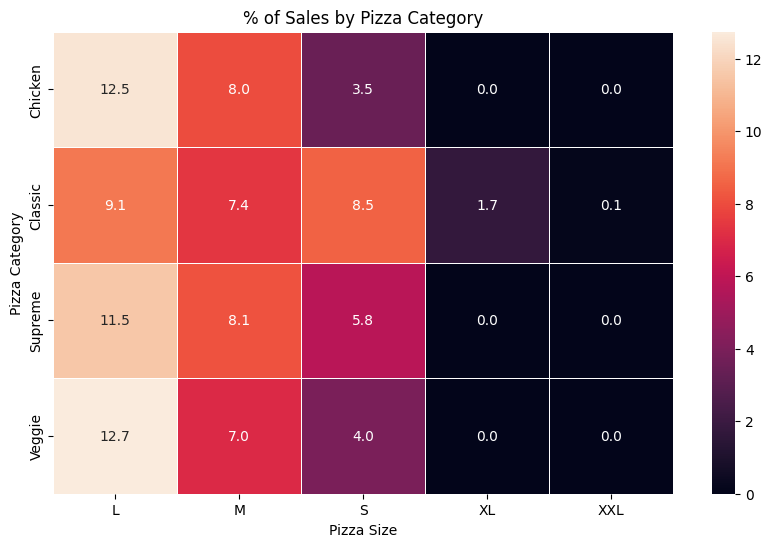

In [166]:
sales_pivot=df.pivot_table(
    index="pizza_category",
    columns="pizza_size",
    values='total_price',
    aggfunc='sum',
    fill_value=0
)
# sales_pivot

sales_pct=sales_pivot/sales_pivot.sum().sum()*100
# sales_pct

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct,annot=True,fmt='.1f',linewidths=0.5)
plt.title("% of Sales by Pizza Category")
plt.xlabel("Pizza Size")
plt.ylabel("Pizza Category")
plt.show()

In [ ]:
# Top 5 Best Selling Pizzas

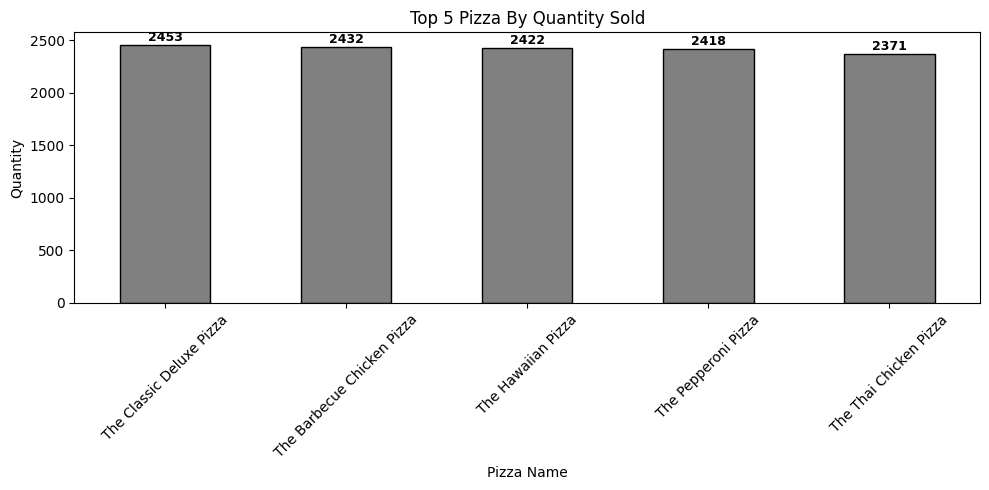

In [195]:
pizza_by_name=df.groupby("pizza_name")['quantity'].sum()

top_5=pizza_by_name.sort_values(ascending=False).head(5)

ax=top_5.plot(kind='bar',figsize=(10,5),color='gray',edgecolor='black')
plt.title("Top 5 Pizza By Quantity Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

for i,val in enumerate(top_5):
    plt.text(i,val+10,str(val),ha="center",va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Top 5 Best Pizza By Order

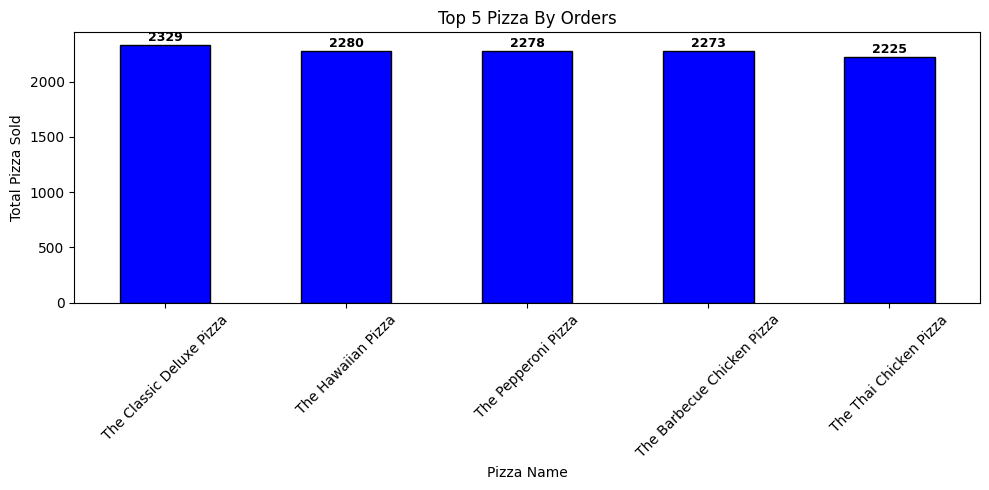

In [194]:
pizza_by_name=df.groupby("pizza_name")['order_id'].nunique()

top_5=pizza_by_name.sort_values(ascending=False).head(5)

ax=top_5.plot(kind='bar',figsize=(10,5),color='blue',edgecolor='black')
plt.title("Top 5 Pizza By Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza Sold")
plt.xticks(rotation=45)

for i,val in enumerate(top_5):
    plt.text(i,val+10,str(val),ha="center",va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Top 5 Best Selling Pizzas

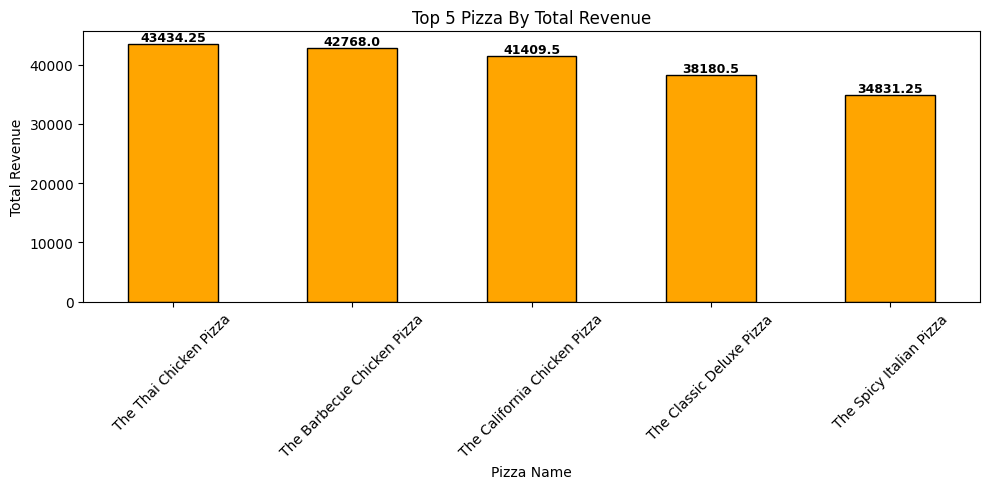

In [193]:
pizza_by_name=df.groupby("pizza_name")['total_price'].sum()

top_5=pizza_by_name.sort_values(ascending=False).head(5)

ax=top_5.plot(kind='bar',figsize=(10,5),color='orange',edgecolor='black')
plt.title("Top 5 Pizza By Total Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(top_5):
    plt.text(i,val+10,str(val),ha="center",va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Bottom 5 Based on Total Sales

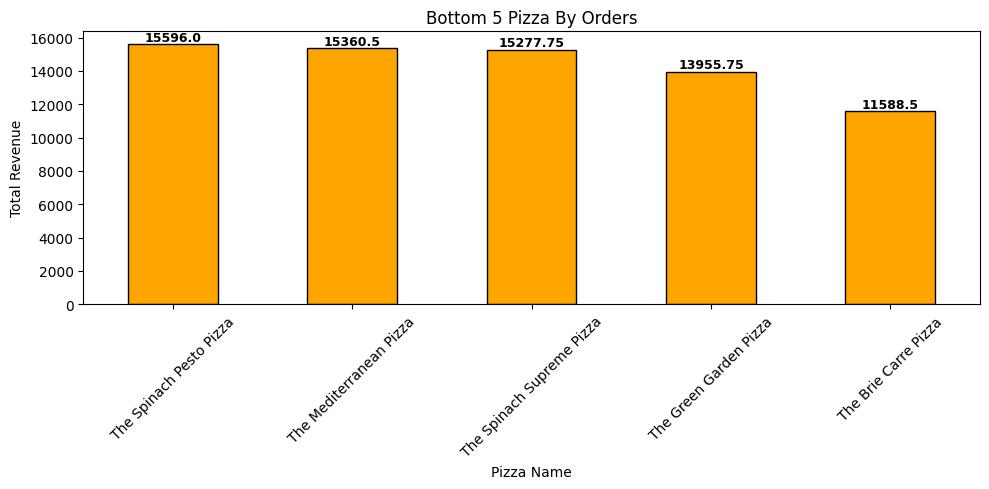

In [192]:
pizza_by_name=df.groupby("pizza_name")['total_price'].sum()

top_5=pizza_by_name.sort_values(ascending=False).tail(5)

ax=top_5.plot(kind='bar',figsize=(10,5),color='orange',edgecolor='black')
plt.title("Bottom 5 Pizza By Orders")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(top_5):
    plt.text(i,val+10,str(val),ha="center",va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()